### NLP (Natural Language Processing) with Python, by Francisco Costela (April 2020)

Script to check whether we can use Python to calculate IA scores and also what can be done using NLP.
    
<ol>Testing with the Alzheimer's project database. <ol>
    There are 4 cognitive status cases (normal, impaired not MCI, MCI, dementia). Will try to predict the cognitive status by using number of words in the descriptions and also applying a NLP approach that examines the vocabulary
    
    
    First, importing all the required libraries and opening the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
#nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np
import operator
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import tensorflow as tf
import numpy as np
from mord import LogisticAT 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
messages = pd.read_excel('/Users/FranciscoCostela/Desktop/Alzheimer/AlzheimerNLP.xlsx')

In [3]:
messages.head()

,id,trial,SegmentID,SegmentName,IAScore,Sharedwords,NumberWords,FinalFixedText,status,GlobalCDR,Age,Sex,Education,cog_status,educationLevel,lengthText,female,subj_tag
0,4,1,43,DEEPB_3a,4.00000,47.0,149,This is a scene of sea lions at the edge of th...,Impaired Not MCI,0.5,83,Female,> 16 Years,1,2,800,Female,1
1,4,2,105,BURY_1b,4.90625,70.0,226,This clip tells quite a bit of story in a shor...,Impaired Not MCI,0.5,83,Female,> 16 Years,1,2,1178,Female,0
2,4,3,13,CORAL_5b,2.12500,41.0,128,This Seems to be certainly entirely fictional ...,Impaired Not MCI,0.5,83,Female,> 16 Years,1,2,661,Female,0
3,4,4,73,WINGE_12a,4.00000,35.0,129,This is a clip of some birds on a body of wate...,Impaired Not MCI,0.5,83,Female,> 16 Years,1,2,650,Female,0
4,4,5,123,FREED_2a,7.15625,38.0,122,Its a picture of a woman walking into looks li...,Impaired Not MCI,0.5,83,Female,> 16 Years,1,2,625,Female,0


In [4]:
messages.describe()

,id,trial,SegmentID,IAScore,Sharedwords,NumberWords,GlobalCDR,Age,cog_status,educationLevel,lengthText,subj_tag
count,1103.000000,1103.000000,1103.000000,1103.000000,139.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,31.669991,10.502267,93.895739,2.671068,20.762590,29.269266,0.421124,81.538531,1.306437,1.340888,342.855848,0.049864
std,16.230695,5.772120,52.444933,1.903405,9.608709,25.542943,0.325334,6.905383,1.000192,0.739000,262.370784,0.217763
min,4.000000,1.000000,13.000000,0.000000,4.000000,0.000000,0.000000,66.000000,0.000000,0.000000,10.000000,0.000000
25%,18.000000,5.000000,43.000000,1.281250,14.000000,13.000000,0.000000,77.000000,1.000000,1.000000,187.000000,0.000000
50%,32.000000,11.000000,93.000000,2.312500,20.000000,21.000000,0.500000,82.000000,1.000000,2.000000,282.000000,0.000000
75%,46.000000,15.500000,133.000000,3.687500,26.000000,37.000000,0.500000,87.000000,2.000000,2.000000,416.000000,0.000000
max,59.000000,20.000000,183.000000,11.125000,70.000000,226.000000,1.000000,99.000000,3.000000,2.000000,2145.000000,1.000000


Checking some of the stats with some plots and the built-in methods with the pandas library

In [5]:
messages.groupby('cog_status').mean()

,id,trial,SegmentID,IAScore,Sharedwords,NumberWords,GlobalCDR,Age,educationLevel,lengthText,subj_tag
cog_status,,,,,,,,,,,
0,21.854015,10.518248,93.445255,3.757642,20.000000,39.733577,0.000000,79.474453,1.500000,477.273723,0.051095
1,26.137931,10.503979,94.185676,2.856102,20.890756,37.795756,0.420424,79.180371,1.310345,342.360743,0.050398
2,40.650685,10.486301,93.804795,2.308220,NaN,19.133562,0.500000,84.828767,1.349315,310.441781,0.051370
3,45.125000,10.500000,94.150000,1.036523,NaN,9.756250,1.000000,84.625000,1.125000,172.987500,0.043750


In [6]:
messages.head()

,id,trial,SegmentID,SegmentName,IAScore,Sharedwords,NumberWords,FinalFixedText,status,GlobalCDR,Age,Sex,Education,cog_status,educationLevel,lengthText,female,subj_tag
0,4,1,43,DEEPB_3a,4.00000,47.0,149,This is a scene of sea lions at the edge of th...,Impaired Not MCI,0.5,83,Female,> 16 Years,1,2,800,Female,1
1,4,2,105,BURY_1b,4.90625,70.0,226,This clip tells quite a bit of story in a shor...,Impaired Not MCI,0.5,83,Female,> 16 Years,1,2,1178,Female,0
2,4,3,13,CORAL_5b,2.12500,41.0,128,This Seems to be certainly entirely fictional ...,Impaired Not MCI,0.5,83,Female,> 16 Years,1,2,661,Female,0
3,4,4,73,WINGE_12a,4.00000,35.0,129,This is a clip of some birds on a body of wate...,Impaired Not MCI,0.5,83,Female,> 16 Years,1,2,650,Female,0
4,4,5,123,FREED_2a,7.15625,38.0,122,Its a picture of a woman walking into looks li...,Impaired Not MCI,0.5,83,Female,> 16 Years,1,2,625,Female,0


Plotting histograms for some of the data

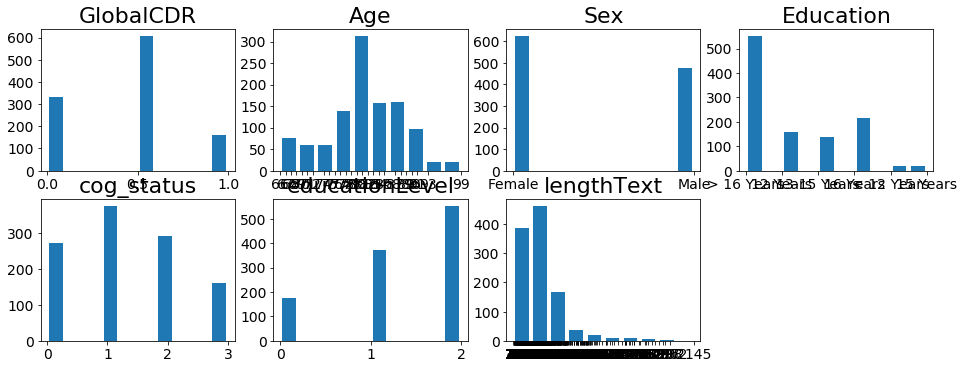

In [7]:
%matplotlib inline
plt.figure(figsize = (16,12))

# get bins for discrete variables
def bin_edges(u): 
    u = sorted(u)
    d = (u[1] - u[0])
    edges = u - d/2
    edges = np.append(edges, edges[-1]+d)
    return edges

sp = 1     
values = messages.keys().values
for key in values[9:16]:
    plt.subplot(4, 4, sp)
    plt.hist(messages[key], rwidth=.75)
    plt.xticks(sorted(messages[key].unique()))
    
    #if sp in [1, 5, 9]:
     #   plt.ylabel('frequency', fontsize=18)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.title(key, fontsize=22)
    sp = sp + 1
#plt.tight_layout()
plt.show()

Trying a joint plot between IA score and the cognitive status. We know there is a clear correlation so it should be clearly visible 

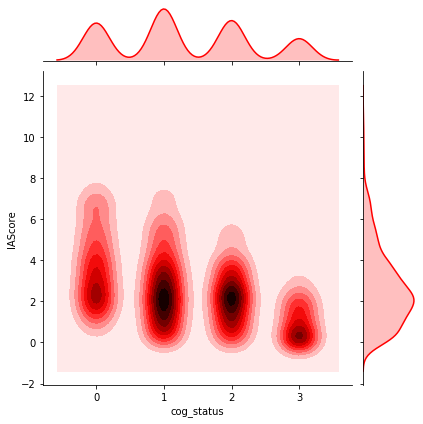

In [8]:
sns.jointplot(x='cog_status',y='IAScore',data=messages,color='red',kind='kde');

The length of the descriptions (number of words and number of characters) may be indicative of cognitive status. Plotting the joint plots...

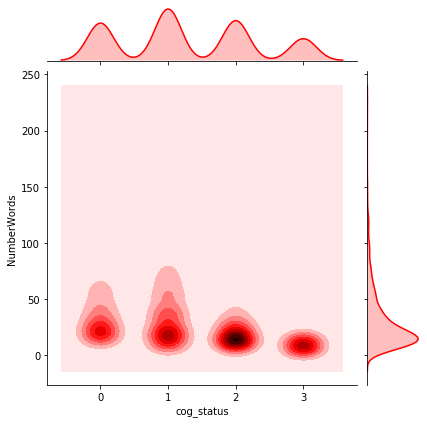

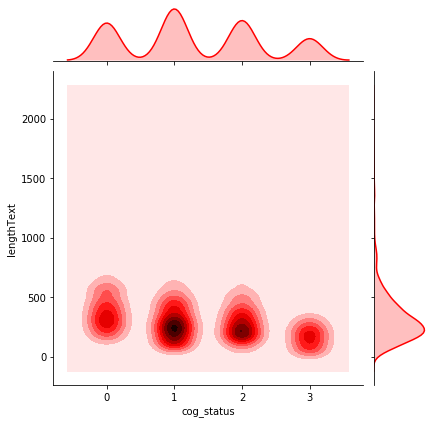

In [9]:
sns.jointplot(x='cog_status',y='NumberWords',data=messages,color='red',kind='kde');
sns.jointplot(x='cog_status',y='lengthText',data=messages,color='red',kind='kde');

Just some other ways to plot histograms below. The joint histogram so far is the best display to show the possible value of using the length of description as predictor of cognitive status

The kernel plot also returns a good plot with the difference between cognitive status

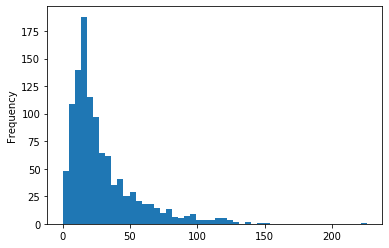

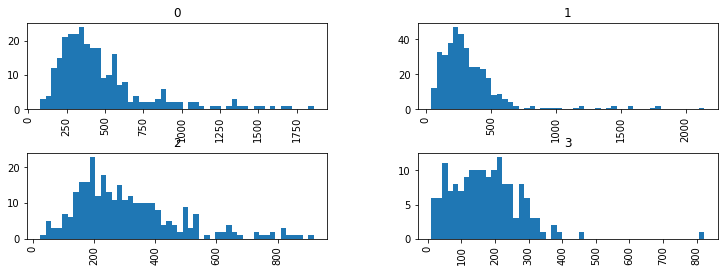

In [10]:
messages['NumberWords'].plot(bins=50, kind='hist') 
messages.hist(column='lengthText', by='cog_status', bins=50,figsize=(12,4))
bins = np.linspace(0, 2000, 10)

cog_status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: lengthText, dtype: object

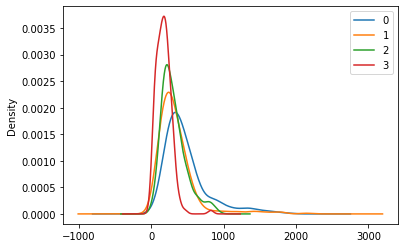

In [11]:
bin_centers = 0.5*(bins[1:] + bins[:-1])
messages.groupby('cog_status')['lengthText'].plot(kind='kde', legend='true')

Going to plot 2D histograms for each variable and divided by the four cognitive status. We know that IA score and Global CDR already should give a good distinction between categories 

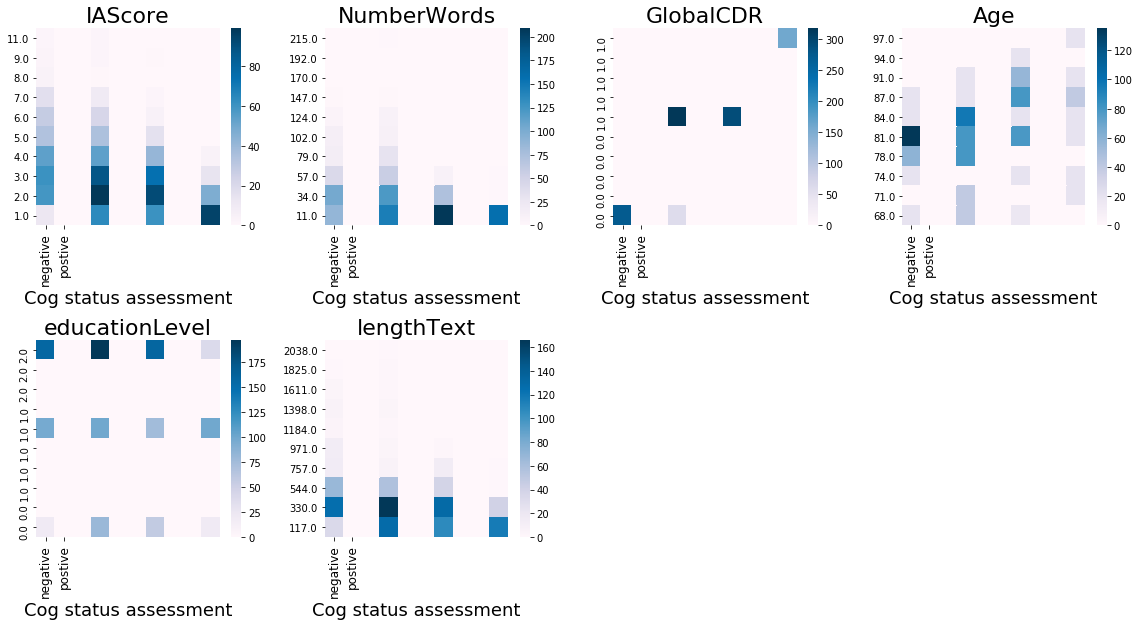

In [12]:
H2d = dict.fromkeys(messages.keys())
H2d.pop('trial')
H2d.pop('SegmentID')
H2d.pop('SegmentName')
H2d.pop('id')
H2d.pop('Education')
H2d.pop('status')
H2d.pop('FinalFixedText')
H2d.pop('Sharedwords')
H2d.pop('Sex')
H2d.pop('cog_status')
H2d.pop('subj_tag')
H2d.pop('female')



def bin_centers(a): 
    return a[:-1] + (a[1] - a[0])/2

plt.figure(figsize = (16,12))
sp = 1
for key in H2d.keys():
    H2d[key] = np.histogram2d(messages[key], messages['cog_status']  )
    ax = plt.subplot(3, 4, sp)
    r = 0
    ytlabels = np.round(bin_centers(H2d[key][1][::-1]), r)
    sns.heatmap(np.flipud(H2d[key][0]), cmap='PuBu', ax=ax, annot=False, 
                yticklabels=ytlabels, xticklabels=['negative', 'postive'])
    ax.set_xlabel('Cog status assessment', size=18)
    ax.set_title(key, size=22)
    sp = sp + 1
    #plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()


Going to try correlations first to see which factor may be more relevant, either number of words or length of text. Also examining how the factors relate to each other. The heatmaps are pretty easy to follow

In [13]:
Y = messages['cog_status']

R = dict([(key,0) for key in H2d])
P = dict([(key,0) for key in H2d])

for key in H2d.keys():
    r, p = stats.pointbiserialr(messages[key], Y)
    R[key] = r
    P[key] = p

# get absolute value of the correlations and sort    
R_abs = dict([(key, abs(item)) for key, item in R.items()]) 
R_sort = list(zip(*sorted(R.items(), key=operator.itemgetter(1), reverse=True)))
R_sort_abs = list(zip(*sorted(R_abs.items(), key=operator.itemgetter(1), reverse=True)))

# plot corrs
sns.set_style('white')
fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(1,2,1)
plt.bar(range(len(R_sort[1])), R_sort[1])
plt.xticks(range(len(R_sort[1])), R_sort[0], rotation=-45, fontsize=12 )
plt.ylabel('correlation coefficient', fontsize=12)

# plot abs corrs
ax2 = fig.add_subplot(1,2,2)
plt.bar(range(len(R_sort_abs[1])), R_sort_abs[1])
plt.xticks(range(len(R_sort_abs[1])), R_sort_abs[0], rotation=-45, fontsize=12 )
plt.ylabel('|correlation coefficient|', fontsize=12)

plt.show()

NameError: name 'stats' is not defined

In [ ]:
# get independent variables
Xvars = list(H2d.keys())
print(Xvars)

R = np.zeros([len(Xvars), len(Xvars)])
P = np.zeros([len(Xvars), len(Xvars)])

# do point biserial correlation for dicho/cont variables
for i in range(len(Xvars)):
    for j in range(len(Xvars)):
        r, p = stats.pointbiserialr(messages[Xvars[i]], messages[Xvars[j]])
        R[i][j] = r
        P[i][j] = p

# plot
fig = plt.figure(figsize=(18,7))
ax1 = fig.add_subplot(1,2, 1)
sns.heatmap(abs(R), annot=True, fmt=".2f", xticklabels=Xvars, yticklabels=Xvars, cmap='PuBu', ax=ax1)
plt.title('Correlation coefficients')

ax2 = fig.add_subplot(1,2,2)
sns.heatmap(P, annot=True, fmt=".2f", xticklabels=Xvars, yticklabels=Xvars, cmap='PuBu', ax=ax2)
plt.title('p values')

plt.show()


Interesting. It looks like number of words has a bigger correlation coefficient than length of text. Also evident to find high correlation between IAscore and Number of wors and lengthText

Now it's time to explore the texts and see what we can do with Python. I'll look for the longest text and will extract the stop words

In [14]:
messages.lengthText.describe()

count    1103.000000
mean      342.855848
std       262.370784
min        10.000000
25%       187.000000
50%       282.000000
75%       416.000000
max      2145.000000
Name: lengthText, dtype: float64

In [15]:
messages[messages['lengthText'] == 2145]['FinalFixedText'].iloc[0]

"Okay that's interesting. a car pulls up this is in an urban setting but you see a building it's at night. you see lit buildings, large buildings, i wouldn't say sky scrapers but tall buildings, business buildings, office buildings. in the background but in the background. the immediate scene although you don't get a very good look at it, it's mostly focused on the man and woman involved. the car pulls up, as i say i think its nighttime, a light colored car pulls up, the door opens, a man gets out he walks around to the back of the car. it's not really mysterious, he opens it a station wagon or something like that, he starts to open the rear of the station wagon and as he does, a woman pulls up, i should mention the male i recognized a little bit later as Kevin Spacey, I didn't recognize the actress. a woman comes around from behind the car and greets him, i couldn't tell whether it appears maybe she got out of the same car but I can't say that i saw her in the car but i don't know whe

In [16]:
longtext =messages[messages['lengthText'] == 2145]['FinalFixedText'].iloc[0]
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [17]:
clean_stopwords = [word for word in longtext.split() if word.lower() not in stopwords.words('english')]
print(clean_stopwords)

['Okay', "that's", 'interesting.', 'car', 'pulls', 'urban', 'setting', 'see', 'building', 'night.', 'see', 'lit', 'buildings,', 'large', 'buildings,', 'say', 'sky', 'scrapers', 'tall', 'buildings,', 'business', 'buildings,', 'office', 'buildings.', 'background', 'background.', 'immediate', 'scene', 'although', 'get', 'good', 'look', 'it,', 'mostly', 'focused', 'man', 'woman', 'involved.', 'car', 'pulls', 'up,', 'say', 'think', 'nighttime,', 'light', 'colored', 'car', 'pulls', 'up,', 'door', 'opens,', 'man', 'gets', 'walks', 'around', 'back', 'car.', 'really', 'mysterious,', 'opens', 'station', 'wagon', 'something', 'like', 'that,', 'starts', 'open', 'rear', 'station', 'wagon', 'does,', 'woman', 'pulls', 'up,', 'mention', 'male', 'recognized', 'little', 'bit', 'later', 'Kevin', 'Spacey,', 'recognize', 'actress.', 'woman', 'comes', 'around', 'behind', 'car', 'greets', 'him,', 'tell', 'whether', 'appears', 'maybe', 'got', 'car', "can't", 'say', 'saw', 'car', 'know', 'else', 'would', 'come

Good. This is working. Now I need to write a function that will apply the removal of stop words for all texts

In [18]:
def text_process(mytext):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mytext if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [19]:
# Check to make sure its working with the first 5 messages
messages['FinalFixedText'].head(5).apply(text_process)

0    [scene, sea, lions, edge, probably, ocean, har...
1    [clip, tells, quite, bit, story, short, clip, ...
2    [Seems, certainly, entirely, fictional, record...
3    [clip, birds, body, water, Longnecked, could, ...
4    [picture, woman, walking, looks, like, high, s...
Name: FinalFixedText, dtype: object

In [20]:
messages['FinalFixedText'].apply(text_process)

0       [scene, sea, lions, edge, probably, ocean, har...
1       [clip, tells, quite, bit, story, short, clip, ...
2       [Seems, certainly, entirely, fictional, record...
3       [clip, birds, body, water, Longnecked, could, ...
4       [picture, woman, walking, looks, like, high, s...
                              ...                        
1098    [Well, indian, reservation, different, aged, p...
1099    [penguins, gathered, together, antarctic, that...
1100    [Well, young, woman, looks, like, shes, new, t...
1101    [Well, people, blind, help, help, thats, theyr...
1102    [Well, three, children, little, dirty, looked,...
Name: FinalFixedText, Length: 1103, dtype: object

Now I have the texts without the stop words. This is promising for the IA scoring. Still need to write the function that compares the number of shared words but that should not be difficult.

Going to apply different prediction methods. I am going to use number of words, since it had a better correlation coefficient than length of text. There are 4 cognitive values to predict, so ordered logistic regresion should be the first one to try. Also trying other methods like multinomial logistic regression. 

In [ ]:
# model performance
def results(y_test, y_pred, display):
    # accuracy, hits, true_negatives, misses, false_positives
    acc = sum(y_test == y_pred)/len(y_test)
    tpos = sum((y_test == 1) & (y_pred==1))/sum(y_test == 1)
    tneg = sum((y_test == 0) & (y_pred==0))/sum(y_test == 0)
    fneg = sum((y_test == 1) & (y_pred==0))/sum(y_test == 1)
    fpos = sum((y_test == 0) & (y_pred==1))/sum(y_test == 0)
    if display:
        # print the results
        print('accuracy = %.3f' % acc)
        print('hits = %.3f' % tpos)
        print('misses = %.3f' % fneg)
        print('true negatives = %.3f' % tneg)
        print('false positives = %.3f' % fpos)
    # save the results
    return {'acc': acc, 'tpos': tpos, 'tneg': tneg, 'fneg': fneg, 'fpos': fpos}

In [ ]:
def acc_fun(target_true, target_fit):
    target_fit = np.round(target_fit)
    target_fit.astype('int')
    return accuracy_score(target_true, target_fit)

acc = make_scorer(acc_fun)
MAE = make_scorer(mean_absolute_error)
folds = 10
model_ordinal = LogisticAT(alpha=0)  # alpha parameter set to zero to perform no regularisation
model_linear = LinearRegression()
model_1vR = LogisticRegression(multi_class='ovr',
    class_weight='balanced')
model_multi = LogisticRegression(multi_class='multinomial',
    solver='lbfgs',
    class_weight='balanced')

features = messages[['NumberWords']]
target = messages['cog_status']               

print('Accuracy:' )
acc_1vR = cross_val_score(model_1vR,
    features,
    target,
    cv=folds,
    scoring=acc)
print('Logistic regression (one versus rest): ', np.mean(acc_1vR))
acc_1vR = cross_val_score(model_1vR,
    features,
    target,
    cv=folds,
    scoring=MAE)
print('Logistic regression (one versus rest) Mean absolute error: ', np.mean(acc_1vR))
acc_multi = cross_val_score(model_multi,
    features,
    target,
    cv=folds,
    scoring=acc)
print('Logistic regression (multinomial): ', np.mean(acc_multi))
acc_multi = cross_val_score(model_multi,
    features,
    target,
    cv=folds,
    scoring=MAE)
print('Logistic regression (multinomial) Mean absolute error: ', np.mean(acc_multi))
acc_ordinal = cross_val_score(model_ordinal,
    features,
    target,
    cv=folds,
    scoring=acc)
print('Ordered logistic regression: ', np.mean(acc_ordinal))

acc_ordinal = cross_val_score(model_ordinal,
    features,
    target,
    cv=folds,
    scoring=MAE)
print('Ordered logistic regression Mean absolute error: ', np.mean(acc_ordinal))


Not very exciting. Best method is the logistic regression multinomial (accuracy 35%). This may be harder to predict with 4 categories. Going to try next with a random forest classifier. I will use this time 70% data for training and 30% data for validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
rfc_preds = rfc.predict(X_test)
print(classification_report(y_test,rfc_preds))
print('MAE:', metrics.mean_absolute_error(y_test, rfc_preds))
print('MSE:', metrics.mean_squared_error(y_test, rfc_preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,rfc_preds)))
print(confusion_matrix(y_test,rfc_preds))
print('Test accuracy is {}'.format(accuracy_score(y_test, rfc_preds)))

37% with Random Forest is better but not promising. Going to build a neural network with a loss function focused on categorical cross . entropy and customize the layers for categorical classification. Also using 30% data to test

In [ ]:
def baseline_model():
# create model
    model = Sequential()
    model.add(Dense(8, input_dim=1, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = baseline_model()
model.fit(X_train, y_train, epochs=200, batch_size=10)
predictions = model.predict_classes(X_test)


In [ ]:
print(classification_report(y_test,predictions))
print('Test accuracy is {}'.format(accuracy_score(y_test, predictions)))

Accuracy of 42% with this configuration of neural networks. It is getting better but this may be a tough classification problem. Going to use a NLP approach based on the specific words, instead of looking at the number of words.

### NLP (Natural Language Processing)

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

Count how many times does a word occur in each message (known as term frequency)

Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Each vector will have as many dimensions as there are unique words in the whole dataset. I am going to use SciKit Learn's CountVectorizer. This model will convert a collection of text documents to a matrix of token counts.

So basically this is like a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message.

In [21]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['FinalFixedText'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

4497


In [22]:
message100 = messages['FinalFixedText'][100]
print(message100)

There are four or five people sitting around a table, one person standing upby a window, nice view out the window but then it got kind of foggy, there is a lake or something with fog on it. And a dog sitting on the window sill or whatever it is and they are having a conversation at the table.


Now let's see its vector representation:

In [23]:
bow100 = bow_transformer.transform([message100])
print(bow100)
print(bow100.shape)

  (0, 620)	1
  (0, 1239)	1
  (0, 1510)	1
  (0, 1836)	1
  (0, 1868)	1
  (0, 1869)	1
  (0, 1904)	1
  (0, 2022)	1
  (0, 2418)	1
  (0, 2455)	1
  (0, 2824)	1
  (0, 2928)	1
  (0, 3060)	1
  (0, 3070)	1
  (0, 3665)	1
  (0, 3691)	2
  (0, 3767)	1
  (0, 3833)	1
  (0, 3986)	2
  (0, 4252)	1
  (0, 4287)	1
  (0, 4392)	1
  (0, 4419)	3
(1, 4497)


This means that there are 23 unique words in message number 4 (after removing common stop words). Two of them appear twice and one three times, the rest only once. Let's go ahead and check and confirm which ones appear twice and three times

In [25]:
print(bow_transformer.get_feature_names()[3691])
print(bow_transformer.get_feature_names()[3986])
print(bow_transformer.get_feature_names()[4419])

sitting
table
window


Now I'll check out how the bag-of-words counts for the entire core of texts is a large, sparse matrix:

In [26]:
messages_bow = bow_transformer.transform(messages['FinalFixedText'])

In [27]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (1103, 4497)
Amount of Non-Zero occurences:  28729


### Analysis with TF-IDF

TF-IDF stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. 

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

In [28]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow100)
print(tfidf4)

  (0, 4419)	0.49386910305125375
  (0, 4392)	0.1432265050829912
  (0, 4287)	0.21032086344574416
  (0, 4252)	0.259511710085366
  (0, 3986)	0.2920219359425074
  (0, 3833)	0.1432265050829912
  (0, 3767)	0.0881852968496156
  (0, 3691)	0.26981820374027765
  (0, 3665)	0.22699832899326014
  (0, 3070)	0.12906297738848663
  (0, 3060)	0.09906194222312992
  (0, 2928)	0.08243272100017981
  (0, 2824)	0.14256323913157706
  (0, 2455)	0.20614148610265098
  (0, 2418)	0.10228995707751955
  (0, 2022)	0.12774045057388259
  (0, 1904)	0.16342008202218622
  (0, 1869)	0.24512430975391397
  (0, 1868)	0.259511710085366
  (0, 1836)	0.20614148610265098
  (0, 1510)	0.17442552497904293
  (0, 1239)	0.1622565779417663
  (0, 620)	0.09925531433794635


I am going to check what is the IDF (inverse document frequency) of different words

In [29]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['penguin']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['think']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['table']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['two']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['Shrek']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['Homer']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['sure']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['happy']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['red']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['water']])

6.39725731440294
2.683685247698633
4.1148749287264135
2.853403632339262
5.298645025734831
6.908082938168931
3.7162357856886494
5.298645025734831
4.369109067110655
3.787187521660934


This makes sense. Complex and specific words (penguin, Shrek, Homer) have bigger IDF scores than other generic words (think, two, sure, water). Now I transform the entire bag-of-words corpus into TF-IDF corpus at once

In [88]:
tfidf = TfidfVectorizer(min_df=3)
tfidf.fit(list(messages['FinalFixedText']))
feature_names = tfidf.get_feature_names()

def get_ifidf_for_words(text):
    tfidf_matrix= tfidf.transform([text]).todense()
    feature_index = tfidf_matrix[0,:].nonzero()[1]
    tfidf_scores = zip([feature_names[i] for i in feature_index], [tfidf_matrix[0, x] for x in feature_index])
    return dict(tfidf_scores)
finaldict = {}
for i in messages['FinalFixedText']:
    finaldict.update(get_ifidf_for_words(i))

finaldict =list(finaldict.items())
finaldict.sort(reverse=True)
finaldict.
    
#tf = TfidfVectorizer(input='content', analyzer='word', ngram_range=(1,6),
#                     min_df = 0, stop_words = 'english', sublinear_tf=True)
#tfidf_matrix =  tf.fit_transform(messages['FinalFixedText'])
#feature_names = tf.get_feature_names()
#doc = 0
#feature_index = tfidf_matrix[doc,:].nonzero()[1]
#tfidf_scores = zip(feature_index, [tfidf_matrix[doc, x] for x in feature_index])
#for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
#  print (w, s)

#from scipy.sparse.csr import csr_matrix #need this if you want to save tfidf_matrix

#tf = TfidfVectorizer(input='filename', analyzer='word', ngram_range=(1,6),
#                     min_df = 0, stop_words = 'english', sublinear_tf=True)
#tfidf_matrix =  tf.fit_transform(messages['FinalFixedText'])
#feature_names = tf.get_feature_names()
#doc = 0
#feature_index = tfidf_matrix[doc,:].nonzero()[1]
#tfidf_scores = zip(feature_index, [tfidf_matrix[doc, x] for x in feature_index])
#for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
 # print w, s

('your', 0.13894439057792315) ('younger', 0.14108302539412865)
('your', 0.13894439057792315) ('younger', 0.14108302539412865)
('your', 0.13894439057792315) ('younger', 0.14108302539412865)
('your', 0.13894439057792315) ('younger', 0.14108302539412865)


With messages represented as vectors, I can finally train the classifier with any sort of classification algorithms. Naive Bayes, Support Vector, and Logistic regressions will be my three classifier methods to compare. Also using 30% data to validate the trained models

In [ ]:
status_detect_model = MultinomialNB().fit(messages_tfidf, messages['cog_status'])

In [ ]:
msg_train, msg_test, label_train, label_test = \
train_test_split(messages['FinalFixedText'], messages['cog_status'], test_size=0.3)
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))
print(confusion_matrix(label_test,predictions))
print('Test accuracy is {}'.format(accuracy_score(label_test, predictions)))

In [ ]:
#all_predictions = status_detect_model.predict(messages_tfidf)
#print(all_predictions)
#print (classification_report(messages['cog_status'], all_predictions))

In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', OneVsRestClassifier(LinearSVC(), n_jobs=1)),  # train on TF-IDF vectors w/ Support vector classifier
])
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))
print(confusion_matrix(label_test,predictions))
print('Test accuracy is {}'.format(accuracy_score(label_test, predictions)))

In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))
print(confusion_matrix(label_test,predictions))
print('Test accuracy is {}'.format(accuracy_score(label_test, predictions)))

So 45% is the best accuracy that we get, with the support vector classiffier. This is definitely a hard classifying problem. Looking at the confusion matrix, it is clear that categories 2 and 3 (not cognitively impaired and MCI) are hard to classify. I am going to simplify the problem by only considering the first group (normal) and the last group (dementia). Having only two categories should make the classification problem easier.

/Users/FranciscoCostela/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(array([274.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 160.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

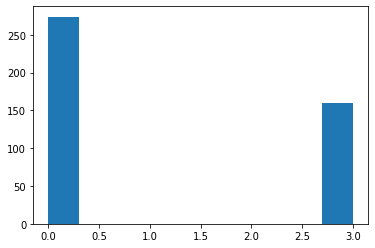

In [90]:
messagesNormalDementia = messages[messages.cog_status != 1 ]
messagesNormalDementia = messagesNormalDementia[messages.cog_status != 2 ]
plt.hist(messagesNormalDementia.cog_status, rwidth=1) 

Going to apply the LinearSVC model to this new simplified dataset:

In [102]:
msg_train, msg_test, label_train, label_test = \
train_test_split(messagesNormalDementia['FinalFixedText'], messagesNormalDementia['cog_status'], test_size=0.3)

In [103]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', OneVsRestClassifier(LinearSVC(), n_jobs=1)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))
print(confusion_matrix(label_test,predictions))
print('Test accuracy is {}'.format(accuracy_score(label_test, predictions)))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91        93
           3       0.71      0.97      0.82        38

    accuracy                           0.88       131
   macro avg       0.85      0.91      0.86       131
weighted avg       0.91      0.88      0.88       131

[[78  1]
 [15 37]]
Test accuracy is 0.8778625954198473


87% accuracy! This is working very well for only two categories. Going to apply random forest classifier with number of words as predictor. It should get a big accuracy as well...

In [119]:
features = messagesNormalDementia[['NumberWords']]
target = messagesNormalDementia['cog_status']    
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)
features.describe()
target.describe()

count    434.000000
mean       1.105991
std        1.448998
min        0.000000
25%        0.000000
50%        0.000000
75%        3.000000
max        3.000000
Name: cog_status, dtype: float64

In [121]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
rfc_preds = rfc.predict(X_test)
print(classification_report(y_test,rfc_preds))
print('MAE:', metrics.mean_absolute_error(y_test, rfc_preds))
print('MSE:', metrics.mean_squared_error(y_test, rfc_preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,rfc_preds)))
print(confusion_matrix(y_test,rfc_preds))
print('Test accuracy is {}'.format(accuracy_score(y_test, rfc_preds)))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85        82
           3       0.71      0.92      0.80        49

    accuracy                           0.83       131
   macro avg       0.83      0.85      0.83       131
weighted avg       0.86      0.83      0.83       131

MAE: 0.5038167938931297
MSE: 1.5114503816793894
RMSE: 1.2294105830353785
[[64 18]
 [ 4 45]]
Test accuracy is 0.8320610687022901


Very promising as well. So both methods, using the number of words as predictor or using a NLP approach by examining the whole vocabulary, returns a prediction accuracy bigger than 83% when there are only 2 categories.